In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
img_array = cv2.imread("train/0/Training_3908.jpg")

In [3]:
img_array.shape

(48, 48, 3)

In [4]:
print(img_array)

[[[163 163 163]
  [128 128 128]
  [114 114 114]
  ...
  [139 139 139]
  [141 141 141]
  [134 134 134]]

 [[147 147 147]
  [114 114 114]
  [102 102 102]
  ...
  [142 142 142]
  [138 138 138]
  [138 138 138]]

 [[112 112 112]
  [106 106 106]
  [ 92  92  92]
  ...
  [140 140 140]
  [141 141 141]
  [134 134 134]]

 ...

 [[139 139 139]
  [141 141 141]
  [136 136 136]
  ...
  [154 154 154]
  [171 171 171]
  [191 191 191]]

 [[140 140 140]
  [133 133 133]
  [120 120 120]
  ...
  [138 138 138]
  [146 146 146]
  [158 158 158]]

 [[136 136 136]
  [134 134 134]
  [113 113 113]
  ...
  [146 146 146]
  [144 144 144]
  [144 144 144]]]


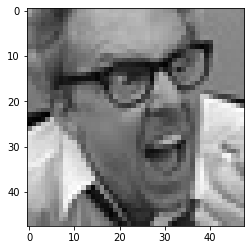

In [5]:
plt.imshow(img_array)

In [6]:
Datadirectory = "train/"

In [7]:
Classes = ["0", "1", "2", "3", "4", "5", "6"]

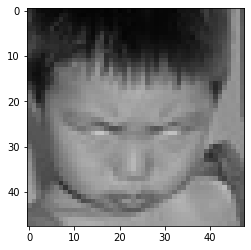

In [8]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

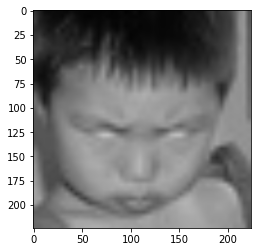

In [9]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
new_array.shape

(224, 224, 3)

# read all the images and convert them to array

In [11]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass


In [12]:
create_training_Data()

In [13]:
print(len(training_Data))

28709


In [14]:
import random

random.shuffle(training_Data)

In [15]:
X = [] ## data/feature
y = [] ## label

for features, label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X, dtype='uint8').reshape(-1, img_size, img_size, 3)
y = np.array(y, dtype='uint8')

In [16]:
X.shape

(28709, 224, 224, 3)

In [17]:
for i in range(0,28709):
    X[i] = X[i]/143.0

### Deep learning model for training - Transfer Learning

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
model = tf.keras.applications.MobileNetV2()

## Transfer Learning - Tuning, weights will start from last check point

In [20]:
base_input = model.layers[0].input

In [21]:
base_output = model.layers[-2].output

In [22]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [23]:
final_output = layers.Dense(128)(base_output)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_ouput)

In [24]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [25]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [26]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [27]:
new_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])

In [28]:
# new_model.fit(X,y, epochs = 12)

In [29]:
#new_model.save('Final_model__new_82p23.h5')

In [30]:
# new_model.fit(X,y, epochs = 7)

In [31]:
## new_model.save('my_model_25p90.h5')

In [32]:
new_model = tf.keras.models.load_model('Final_model__new_82p23.h5')

In [33]:
# new_model.fit(X,y, epochs = 14)

In [61]:
frame = cv2.imread("images/disgust.jpg")


In [62]:
frame.shape

(612, 612, 3)

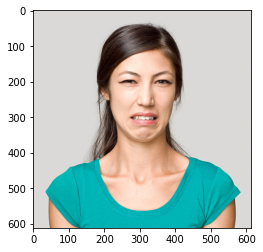

In [63]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [64]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [65]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [66]:
gray.shape

(612, 612)

In [67]:

faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 255, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

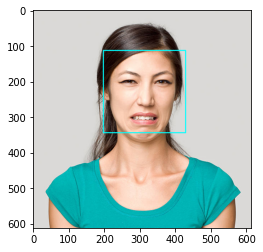

In [68]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

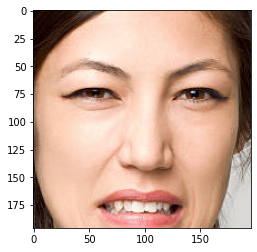

In [69]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [70]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

In [71]:

predictions = new_model.predict(final_image)


In [72]:
predictions[0]

array([3.4934361e-02, 9.6122426e-01, 1.5999409e-03, 1.7685579e-05,
       1.0276473e-03, 1.1710699e-03, 2.5086607e-05], dtype=float32)

In [73]:
np.argmax(predictions)

1

In [74]:
np.sort(predictions)

array([[1.7685579e-05, 2.5086607e-05, 1.0276473e-03, 1.1710699e-03,
        1.5999409e-03, 3.4934361e-02, 9.6122426e-01]], dtype=float32)

###### 0  -------  Angry
###### 1  -------  disgust
###### 2  -------  fear
###### 3  -------  happy
###### 4  -------  neutral
###### 5  -------  Sad
###### 6  -------  surprise
